In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('all_perth.csv')

In [35]:
data_clean = data[features].dropna()

In [16]:
features = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
            'FLOOR_AREA', 'CBD_DIST', 'NEAREST_SCH_RANK']
data = df[features].dropna()

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [18]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

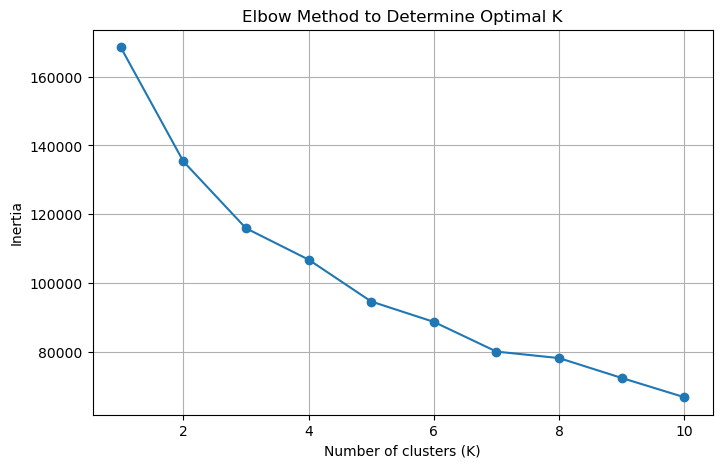

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [33]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [39]:
# Cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [40]:
data_clean['Cluster'] = cluster_labels 

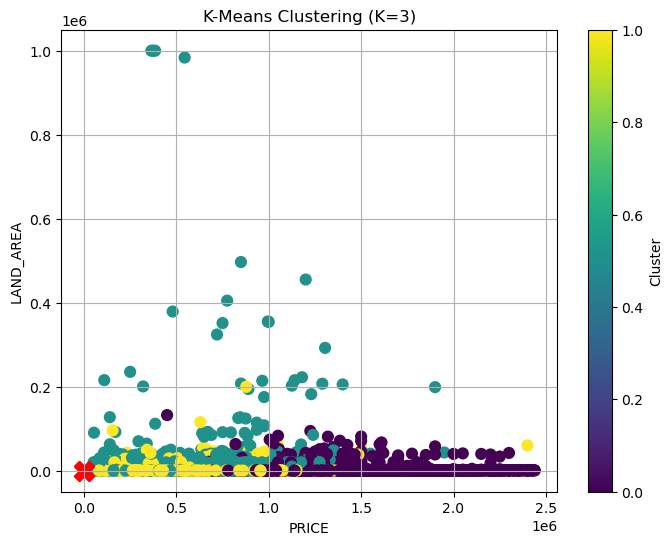

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(data_clean['PRICE'], data_clean['LAND_AREA'], c=data_clean['Cluster'], cmap='viridis', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('PRICE')
plt.ylabel('LAND_AREA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()